<a href="https://colab.research.google.com/github/bon-u/S1Project/blob/main/AI07_S1P_%EA%B5%AC%EB%B3%B8%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import pandas as pd
df=pd.read_csv('/vgames2.csv',index_col = 0)
df['NA_Sales']=df['NA_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['EU_Sales']=df['EU_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['JP_Sales']=df['JP_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df['Other_Sales']=df['Other_Sales'].replace({'K':'*1e-3','M':''},regex=True).map(pd.eval).astype(float)
df.head(10)
#출고량 단위를 맞추고 숫자형으로 만들어줌

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [219]:
dfg=df.drop(['Name','Platform','Year','Publisher'],axis=1)
dfg=dfg.dropna(axis=0)
gen=dfg.groupby(dfg['Genre']).mean() 
#지역별 장르의 출고량 평균 데이터 프레임을 생성
print(gen)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        0.264693  0.157991  0.047776     0.056415
Adventure     0.082547  0.050039  0.040586     0.013133
Fighting      0.263518  0.119504  0.103117     0.043259
Misc          0.235323  0.122468  0.060709     0.042699
Platform      0.505023  0.228066  0.147794     0.058292
Puzzle        0.213408  0.087768  0.098391     0.021661
Racing        0.287361  0.190748  0.045374     0.062027
Role-Playing  0.215469  0.123790  0.232603     0.038409
Shooter       0.444893  0.239335  0.029266     0.078479
Simulation    0.211514  0.131040  0.073642     0.036393
Sports        0.290696  0.160820  0.057826     0.057527
Strategy      0.101029  0.066647  0.072735     0.016706


In [220]:
nan=gen.sort_values(by='NA_Sales', ascending=False)
nae=gen.sort_values(by='EU_Sales', ascending=False)
naj=gen.sort_values(by='JP_Sales', ascending=False)
nao=gen.sort_values(by='Other_Sales', ascending=False) 
#장르를 각 지역별 출고량 순위로 배열
print('지역별 장르 순위 TOP 3')
print('NA')
print('1위:',nan.index[0],'2위:',nan.index[1],'3위:',nan.index[2])
print('EU')
print('1위:',nae.index[0],'2위:',nae.index[1],'3위:',nae.index[2])
print('JP')
print('1위:',naj.index[0],'2위:',naj.index[1],'3위:',naj.index[2])
print('기타')
print('1위:',nao.index[0],'2위:',nao.index[1],'3위:',nao.index[2])

지역별 장르 순위 TOP 3
NA
1위: Platform 2위: Shooter 3위: Sports
EU
1위: Shooter 2위: Platform 3위: Racing
JP
1위: Role-Playing 2위: Platform 3위: Fighting
기타
1위: Shooter 2위: Racing 3위: Platform


In [221]:
dfy=df.drop(['Name','Platform','Publisher'],axis=1)
dfy['Sales']=dfy['NA_Sales']+dfy['EU_Sales']+dfy['JP_Sales']+dfy['Other_Sales']
dfy=dfy.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
dfy=dfy.dropna(axis=0)
for i in range(0,dfy.shape[0]):
  if dfy.iloc[i,0]<=22:
    dfy.iloc[i,0]=dfy.iloc[i,0]+2000
  elif dfy.iloc[i,0]<100:
    dfy.iloc[i,0]=dfy.iloc[i,0]+1900
  else:
    dfy.iloc[i,0]=dfy.iloc[i,0]
dfy.head()
#연도의 표현을 맞춰주고 지역별 출고량을 합한 Sales 컬럼을 만듬

,Year,Genre,Sales
1,2008.0,Action,0.04
2,2009.0,Action,0.18
3,2010.0,Adventure,0.02
4,2010.0,Misc,0.04
5,2010.0,Platform,0.25


In [222]:
dfp=dfy.pivot_table(index = 'Genre', columns = 'Year', values = 'Sales',aggfunc='mean')
dfp=dfp.fillna(0)
dfp.head()
#피벗테이블을 사용해 연도별 각 장르의 평균 출고량을 구함

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,0.340,0.591600,0.361111,0.408571,1.85,1.7600,2.290,0.555,0.8700,2.325000,2.13,1.352000,3.840000,0.301667,0.387500,0.447500,1.030000,0.890000,0.895682,0.708205,0.788140,0.858788,0.693200,0.472083,0.609200,0.445417,0.361359,0.504714,0.618539,0.510406,0.519912,0.497908,0.457614,0.846014,0.532312,0.269763,0.166807,0.01,0.0
Adventure,0.000,0.000000,0.000000,0.400000,0.00,0.0000,0.000,4.380,0.0000,0.000000,0.00,1.120000,3.060000,0.070000,0.935000,0.054615,0.245882,0.355000,0.393043,0.400526,0.185000,0.448000,0.270000,0.176667,0.221282,0.203095,0.161690,0.290952,0.150060,0.146596,0.108301,0.148411,0.103509,0.110167,0.081200,0.151132,0.053235,0.00,0.0
Fighting,0.770,0.000000,0.000000,0.000000,0.00,1.0500,0.000,2.710,0.0000,0.000000,0.00,0.390000,2.175714,0.795455,0.385000,0.511724,0.601333,0.421429,0.772683,0.596250,0.698621,1.005556,0.461481,0.540682,0.429744,0.457674,0.409636,0.352600,0.621228,0.607170,0.372000,0.451224,0.328621,0.361500,0.702174,0.370476,0.275000,0.00,0.0
Misc,0.675,0.000000,0.870000,2.140000,1.45,0.0000,0.000,0.000,0.0000,1.280000,0.00,0.080000,2.470000,0.100000,0.476667,0.290455,0.463478,0.473333,0.563810,0.827200,0.777500,0.630385,0.347333,0.448868,0.366588,0.531565,0.616789,0.611126,0.410381,0.371498,0.442000,0.304754,0.603421,0.610952,0.578780,0.298974,0.063889,0.00,0.0
Platform,0.000,2.306667,1.006000,1.386000,0.69,10.7925,1.565,0.870,6.9325,6.886667,7.66,1.271667,2.235000,1.698182,2.614545,1.283846,2.016429,1.214444,1.193200,1.155556,0.668750,0.914651,0.596753,0.492184,0.717273,0.278171,0.920370,0.845952,0.575000,1.462500,1.031613,0.760000,1.546667,0.678108,0.887000,0.432143,0.208000,0.00,0.0


In [223]:
for y in range(0,dfp.shape[1]):
  dfs=dfp.sort_values(by=dfp.columns[y],ascending=False)
  print(dfp.columns[y],'년도 장르 순위 1위:',dfs.index[0],'2위:',dfs.index[1],'3위:',dfs.index[2])

1980.0 년도 장르 순위 1위: Shooter 2위: Fighting 3위: Misc
1981.0 년도 장르 순위 1위: Platform 2위: Puzzle 3위: Shooter
1982.0 년도 장르 순위 1위: Puzzle 2위: Platform 3위: Misc
1983.0 년도 장르 순위 1위: Sports 2위: Misc 3위: Platform
1984.0 년도 장르 순위 1위: Shooter 2위: Sports 3위: Racing
1985.0 년도 장르 순위 1위: Platform 2위: Sports 3위: Action
1986.0 년도 장르 순위 1위: Role-Playing 2위: Action 3위: Racing
1987.0 년도 장르 순위 1위: Adventure 2위: Fighting 3위: Role-Playing
1988.0 년도 장르 순위 1위: Platform 2위: Puzzle 3위: Racing
1989.0 년도 장르 순위 1위: Puzzle 2위: Platform 3위: Action
1990.0 년도 장르 순위 1위: Platform 2위: Racing 3위: Puzzle
1991.0 년도 장르 순위 1위: Action 2위: Platform 3위: Racing
1992.0 년도 장르 순위 1위: Racing 2위: Action 3위: Adventure
1993.0 년도 장르 순위 1위: Platform 2위: Shooter 3위: Puzzle
1994.0 년도 장르 순위 1위: Platform 2위: Adventure 3위: Shooter
1995.0 년도 장르 순위 1위: Platform 2위: Role-Playing 3위: Fighting
1996.0 년도 장르 순위 1위: Platform 2위: Role-Playing 3위: Racing
1997.0 년도 장르 순위 1위: Platform 2위: Role-Playing 3위: Action
1998.0 년도 장르 순위 1위: Platform 2위: Role-Playing 3위

In [224]:
dfn=df
dfn['Sales']=dfn['NA_Sales']+dfn['EU_Sales']+dfn['JP_Sales']+dfn['Other_Sales']
dfn=dfn.sort_values(by='Sales',ascending=False)
dfn.head(10)
#각 게임의 출고량을 합하고 출고량이 높은순서대로 정렬함

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [225]:
pub=dfn[['Genre','Publisher','Sales']]
pub=pub.dropna(axis=0)
pub.head(10)
#Publisher와 Genre에 따른 출고량을 보기위해 데이터를 정리

,Genre,Publisher,Sales
2909,Sports,Nintendo,82.74
4200,Platform,Nintendo,40.24
12580,Racing,Nintendo,35.83
3353,Sports,Nintendo,33.00
7830,Role-Playing,Nintendo,31.38
1204,Puzzle,Nintendo,30.26
6938,Platform,Nintendo,30.01
3015,Misc,Nintendo,29.01
16532,Platform,Nintendo,28.61
10489,Shooter,Nintendo,28.31


In [227]:
pubg=pub.groupby('Publisher')['Sales'].agg(**{'Sales_Mean':'mean','Count':'count'})
pubg=pubg.sort_values(by='Sales_Mean',ascending=False)
print(pubg.head())
palcom=dfn.loc[dfn['Publisher']=='Palcom']
print('Palcom이 제작한 게임의 갯수 :',palcom.shape[0])#팔콤 회사의 게임 갯수
#게임별 매출 평균이 가장높은 회사를 뽑았으나 닌텐도 이외에는 게임의 갯수가 적어 분석에 적합하지 않음을 확인

                     Sales_Mean  Count
Publisher                             
Palcom                 4.170000      1
Red Orb                2.625000      2
Nintendo               2.520329    699
Arena Entertainment    2.360000      2
UEP Systems            2.260000      1
Palcom이 제작한 게임의 갯수 : 1


In [236]:
pub100=pubg
for i in range(0,pubg.shape[0]):
  if pubg.iloc[i,1] < 100:
    pub100=pub100.drop([pubg.index[i]],axis=0)
pub100.head()
#게임을 100개 이상 만든 회사만 출고량 평균이 높은순으로 정렬

,Sales_Mean,Count
Publisher,,
Nintendo,2.520329,699
Microsoft Game Studios,1.300423,189
Take-Two Interactive,0.968010,412
Sony Computer Entertainment,0.887941,680
Electronic Arts,0.821518,1344


In [230]:
pub1=dfn.loc[dfn['Publisher']==pub100.index[0]]
pub2=dfn.loc[dfn['Publisher']==pub100.index[1]]
pub3=dfn.loc[dfn['Publisher']==pub100.index[2]]
pub4=dfn.loc[dfn['Publisher']==pub100.index[3]]
pub5=dfn.loc[dfn['Publisher']==pub100.index[4]]
top=pub1.groupby('Genre')['Sales'].agg(**{'TOP1':'mean'})
top['TOP2']=pub2.groupby('Genre')['Sales'].agg(**{'TOP2':'mean'})
top['TOP3']=pub3.groupby('Genre')['Sales'].agg(**{'TOP3':'mean'})
top['TOP4']=pub4.groupby('Genre')['Sales'].agg(**{'TOP4':'mean'})
top['TOP5']=pub5.groupby('Genre')['Sales'].agg(**{'TOP5':'mean'})
top['Sum']=top['TOP1']+top['TOP2']+top['TOP3']+top['TOP4']+top['TOP5']
top
#상위 5개 회사의 장르별 평균 출고량과 그 합

,TOP1,TOP2,TOP3,TOP4,TOP5,Sum
Genre,,,,,,
Action,1.623165,0.592381,2.285109,1.034719,0.633187,6.168560
Adventure,1.019143,0.536667,0.630000,0.330244,0.364615,2.880669
Fighting,2.962778,0.492000,0.060000,0.938333,0.806154,5.259265
Misc,1.738788,1.382647,0.392963,0.631260,0.551333,4.696991
Platform,3.814107,0.275000,0.308182,1.588923,0.406250,6.392462
Puzzle,1.699589,0.090000,0.070000,0.310833,0.650000,2.820422
Racing,4.173056,1.505000,1.062500,1.700923,0.908481,9.349960
Role-Playing,2.576286,1.285625,1.011667,0.898571,1.008286,6.780435
Shooter,2.680769,3.408571,0.839692,1.129020,1.141159,9.199212


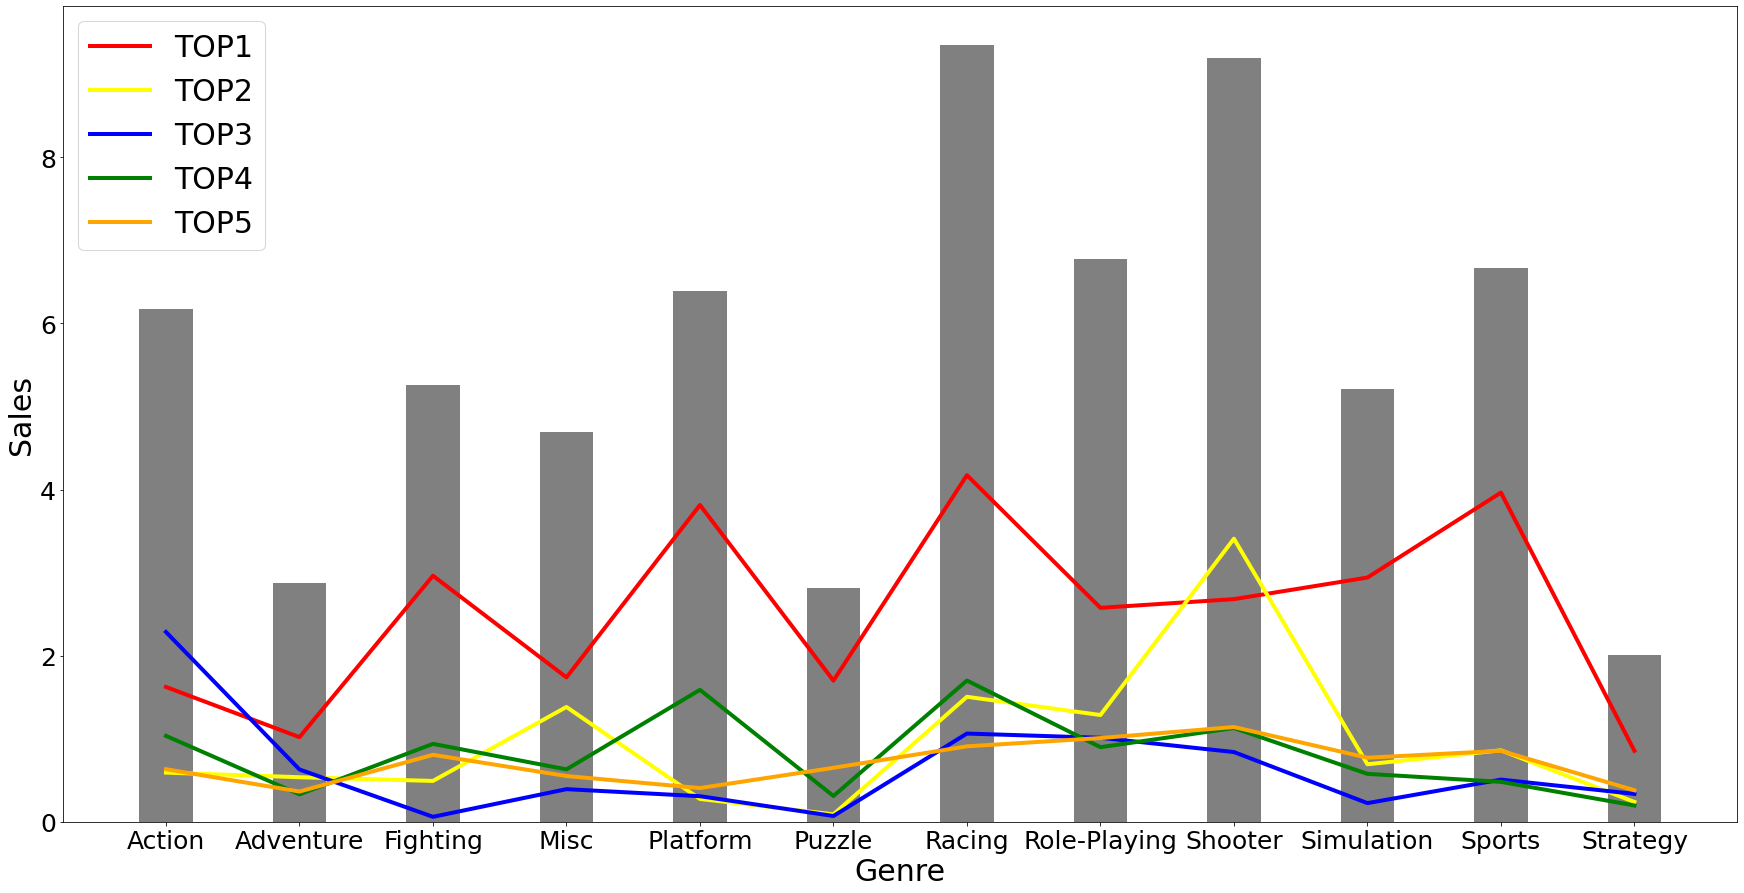

In [231]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.bar(top.index,top.Sum,color='gray',width=0.4)
plt.plot(top.index,top.TOP1,color='red',linewidth=4,label='TOP1')
plt.plot(top.index,top.TOP2,color='yellow',linewidth=4,label='TOP2')
plt.plot(top.index,top.TOP3,color='blue',linewidth=4,label='TOP3')
plt.plot(top.index,top.TOP4,color='green',linewidth=4,label='TOP4')
plt.plot(top.index,top.TOP5,color='orange',linewidth=4,label='TOP5')

plt.xlabel('Genre', fontsize=30)
plt.ylabel('Sales', fontsize=30)
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
plt.legend(fontsize=30, loc=2)